In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from IPython.display import display
import seaborn as sns

## Filter data

In [2]:
def filter_data(data_sent , max_flux= -12):
    data = data_sent.copy()
    #max_flux = -12
    min_flux = 26
    data = data[data['flux_aper']<max_flux]

    data = data[data['significance']>2]
    data_class = data[['class']]

    data_sig = data['significance']
    data_id = data['src_id']
    data_name = data['src_n']
    obs_info_params = [ 'livetime','likelihood','pileup_flag','mstr_sat_src_flag','mstr_streak_src_flag'   ,'gti_obs' , 'flux_significance_b'  , 'flux_significance_m' , 'flux_significance_s' , 'flux_significance_h' , 'flux_significance_u'    ]
    data_val = data.drop(columns=obs_info_params).reset_index(drop=True)
    return data_val

def norm_data(data_sent):
    data = data_sent.copy()
    #data.replace()
    for d in data:
        max_val = np.amax(data[d])
        min_val =  np.amin(data[d])
        data[d] = (data[d]-min_val)/(max_val-min_val)
    return data
def std_data(data_sent):
    data = data_sent.copy()
    for d in data:
        mean =  np.mean(data[d])
        std = np.sqrt(np.var(data[d]))
        data[d] = (data[d]-mean)/std 
    return data
def do_nothing(data_sent):
    return data_sent

In [3]:
def extract_data(data_sent , impute_fn = '',reduce_fn = ' ' , rf_impute=False):
    data = data_sent.copy()
    data = data.sample(frac=1)
    #data = filter_data(data)
    #display(data)
    data_id = data[['obs_id' ,'class' ,'src_n' , 'src_id' ,'significance' , ]]
    data_id = data_id.reset_index(drop=True)
    data_val = data.drop(['index' , 'class' ,'src_n' , 'src_id' ,'significance' , 'obs_id'] , axis=1)
    data_val = reduce_fn(data_val)
    return data_val , data_id
    #if(rf_impute):
    #    data_val  , random_forest_imputer = impute_fn(data_val , data_id)
    #else:
    #    data_val = impute_fn(data_val)
    data_val = reduce_fn(data_val)
    data_val = data_val.reset_index(drop=True)
    data_reduced = pd.concat([data_id , data_val] , axis=1)
    if(rf_impute):
        return(data_reduced , random_forest_imputer)
    else:
        return data_reduced

## Load data

In [4]:

train_bh = pd.read_csv('../processed_data/BH_.csv')
train_bh = train_bh.sample(frac=1)
train_bh = filter_data(train_bh , max_flux=-12)


train_ns = pd.read_csv('../processed_data/NS_.csv' )
train_ns = train_ns.sample(frac=1)
train_ns = filter_data(train_ns , max_flux=-12)


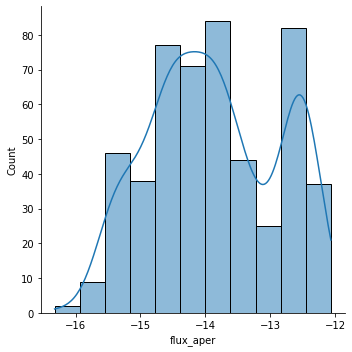

In [5]:
train_cv = pd.read_csv('../processed_data/CV_.csv')
train_cv = train_cv.sample(frac=1)
train_cv = filter_data(train_cv , max_flux=-12)
sns.displot(train_cv['flux_aper'] , kde=True)

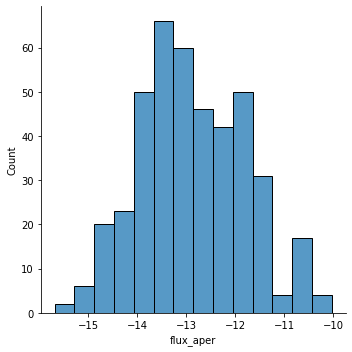

In [6]:

train_plsr = pd.read_csv('../processed_data/PULSAR_.csv')
train_plsr = train_plsr.sample(frac=1)
train_plsr = filter_data(train_plsr , max_flux=-10)
sns.displot(train_plsr['flux_aper'])
plt.show()

In [7]:
train_plsr['src_id'].value_counts()

PL0081    62
PL0099    59
PL0015    18
PL0003    17
PL0017    13
          ..
PL0123     1
PL0022     1
PL0077     1
PL0033     1
PL0046     1
Name: src_id, Length: 124, dtype: int64

In [8]:

train = pd.concat([train_bh , train_ns  , train_cv , train_plsr] , axis=0)
train = train.replace('NS' , 'XRB')
train = train.replace('BH' , 'XRB')
train =  train.sample(frac=1).reset_index(drop=True)
display(train)


,index,obs_id,class,src_n,src_id,significance,flux_aper_hilim_s,flux_aper_hilim_u,flux_aper_hilim_m,flux_aper_hilim_h,...,bb_ampl_lolim,bb_ampl_hilim,bb_stat,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat
0,477,CV_OBS_477,CV,CXOGLB J002404.9-72045,CV0077,19.64,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,66,CV_OBS_66,CV,[HPH2013] 108,CV0005,14.30,-14.596193,-12.863597,-14.672845,-13.979225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,62,CV_OBS_62,CV,[HPH2013] 108,CV0005,14.30,-14.932185,NaN,NaN,-15.228633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,318,NS_OBS_318,XRB,XMMU J004414.0+41220,NS0047,6.53,-14.283162,-13.421475,-14.675923,-12.947691,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,228,NS_OBS_228,XRB,XMMU J004245.2+41172,NS0044,49.26,-13.834162,-12.857298,-14.505985,-13.758205,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,313,NS_OBS_313,XRB,XMMU J004245.2+41172,NS0046,4.71,-15.803824,NaN,NaN,-14.263365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1392,392,CV_OBS_392,CV,CXOGLB J002402.5-72051,CV0070,22.52,-14.025120,NaN,-14.336299,-13.927015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1393,514,CV_OBS_514,CV,CXOGLB J002406.0-72045,CV0081,25.99,-14.139004,-14.369572,-14.152304,-13.744969,...,0.000037,0.000065,2.5,3.5,5.026,2.507,6.513,10.92,2.512,1.093
1394,347,NS_OBS_347,XRB,J1748-2446,NS0057,18.31,-15.771343,NaN,-15.105352,-13.838632,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
train['class'].value_counts()

CV        515
XRB       460
PULSAR    421
Name: class, dtype: int64

# RF imputer

In [10]:
from MissingValuesHandler.missing_data_handler import RandomForestImputer

In [11]:
def rf_impute(d, i ):
    data = pd.concat([i , d] , axis=1)
    data = data.drop(columns=['src_n' , 'src_id' , 'significance' , 'obs_id'])
    rf_imputer = RandomForestImputer(
        data=data , 
        target_variable_name='class' , 
        forbidden_features_list=[] , 
        
    )
    rf_imputer.set_ensemble_model_parameters(n_estimators=400 , additional_estimators = 100 )
    new_data =  rf_imputer.train(sample_size = 0, path_to_save_dataset='processed_data/rf_imp.csv')
    new_data = new_data.drop(columns= ['class'])
    return new_data , rf_imputer

In [12]:
data_val , data_id   = extract_data(train ,  impute_fn= rf_impute , reduce_fn= do_nothing , rf_impute=True )


In [13]:
new_data , random_forest_imputer = rf_impute(data_val, data_id)
#train_data.index.name = 'index'
#display(train_data.describe())
#train_data.to_csv('../processed_data/train_norm_rf_impute')

In [36]:
train

,index,obs_id,class,src_n,src_id,significance,flux_aper_hilim_s,flux_aper_hilim_u,flux_aper_hilim_m,flux_aper_hilim_h,...,bb_ampl_lolim,bb_ampl_hilim,bb_stat,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat
0,401,CV_OBS_401,CV,CXOGLB J002402.5-72051,CV0070,22.52,-14.526659,-14.519706,-14.182765,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47,BH_OBS_47,XRB,CXOU J100506.7-07443,BH0014,11.41,-15.370285,-13.414426,-15.903438,-15.907279,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,139,PULSAR_OBS_139,PULSAR,PSR J1111-6039,PL0038,23.20,-14.504178,-15.563678,-13.660946,-12.740167,...,1.442000e-05,0.000022,1.170,13.580,46.030,10.190,98.86,106.5,84.95,0.734
3,136,NS_OBS_136,XRB,IGR J17464-2811,NS0030,6.94,-14.030211,-13.827397,-13.970616,-11.797239,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,290,PULSAR_OBS_290,PULSAR,PSR J1809-233,PL0086,2.15,NaN,NaN,-14.659358,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,239,NS_OBS_239,XRB,XMMU J004245.2+41172,NS0044,49.26,-14.327533,-15.003795,-14.285335,-13.915781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1392,136,PULSAR_OBS_136,PULSAR,PSR J1101-6101,PL0036,31.13,-14.009972,-13.354774,-13.381847,-12.376234,...,1.308000e-05,0.000018,1.221,100.000,NaN,64.020,94.52,101.8,87.73,1.141
1393,184,BH_OBS_184,XRB,J1745-2900,BH0027,337.00,-15.308653,NaN,-14.283329,-11.692932,...,1.409000e-03,0.002699,1.082,1.581,1.745,1.439,1472.00,1571.0,1380.00,1.057
1394,165,PULSAR_OBS_165,PULSAR,PSR J1418-605,PL0053,12.04,-15.399245,-12.151565,-14.505706,-13.234928,...,7.302000e-07,0.000002,0.581,100.000,NaN,26.420,209.50,245.5,181.20,0.628


In [37]:
pd.read_csv('processed_data/rf_imp.csv')

,flux_aper_hilim_s,flux_aper_hilim_u,flux_aper_hilim_m,flux_aper_hilim_h,flux_aper_hilim_b,flux_aper_lolim_s,flux_aper_lolim_u,flux_aper_lolim_m,flux_aper_lolim_h,flux_aper_lolim_b,...,bb_ampl_hilim,bb_stat,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat,class
0,-14.526659,-14.519706,-14.182765,-13.000000,-14.081131,-15.392009,-13.000000,-14.667764,-13.000000,-14.482540,...,0.000000,1.000,19.000,51.000,11.000,160.00,182.0,170.00,1.000,CV
1,-15.370285,-13.414426,-15.903438,-15.907279,-15.777804,-15.734004,-14.550059,-17.049684,-13.000000,-13.000000,...,0.000000,1.000,19.000,48.000,11.000,155.00,182.0,161.00,1.000,PULSAR
2,-14.504178,-15.563678,-13.660946,-12.740167,-12.696156,-14.658170,-13.000000,-13.726767,-12.787812,-12.733533,...,0.000022,1.170,13.580,46.030,10.190,98.86,106.5,84.95,0.734,CV
3,-14.030211,-13.827397,-13.970616,-11.797239,-11.805208,-15.702239,-13.000000,-15.583359,-11.925184,-11.931072,...,0.000000,1.000,19.000,50.000,11.000,162.00,184.0,171.00,1.000,CV
4,-14.000000,-13.000000,-14.659358,-13.000000,-14.884057,-14.000000,-13.000000,-15.726304,-13.000000,-13.000000,...,0.000000,1.000,15.000,33.000,8.000,137.00,158.0,147.00,1.000,XRB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,-14.327533,-15.003795,-14.285335,-13.915781,-13.699839,-14.509901,-13.000000,-14.459420,-14.111371,-13.802995,...,0.000000,1.000,19.000,51.000,11.000,162.00,182.0,170.00,1.000,CV
1392,-14.009972,-13.354774,-13.381847,-12.376234,-12.337337,-14.153477,-14.178683,-13.436756,-12.410609,-12.366128,...,0.000018,1.221,100.000,34.000,64.020,94.52,101.8,87.73,1.141,XRB
1393,-15.308653,-13.000000,-14.283329,-11.692932,-11.701147,-14.000000,-13.000000,-14.579219,-11.717831,-11.726073,...,0.002699,1.082,1.581,1.745,1.439,1472.00,1571.0,1380.00,1.057,CV
1394,-15.399245,-12.151565,-14.505706,-13.234928,-13.227165,-16.244354,-13.129304,-14.686133,-13.314258,-13.298432,...,0.000002,0.581,100.000,39.000,26.420,209.50,245.5,181.20,0.628,PULSAR


In [38]:
data_id

,obs_id,class,src_n,src_id,significance
0,CV_OBS_422,CV,CXOGLB J002403.6-72045,CV0073,12.38
1,PULSAR_OBS_348,PULSAR,PSR J1833-103,PL0099,121.78
2,CV_OBS_238,CV,[HPH2013] 196,CV0020,8.11
3,CV_OBS_785,CV,XSS J12270-4859,CV0112,27.61
4,NS_OBS_198,XRB,XMMU J004245.2+41172,NS0044,49.26
...,...,...,...,...,...
1391,CV_OBS_535,CV,CXOGLB J002407.1-72054,CV0083,18.17
1392,NS_OBS_178,XRB,XMMU J004245.2+41172,NS0044,49.26
1393,CV_OBS_384,CV,CXOGLB J002402.1-72054,CV0069,46.73
1394,PULSAR_OBS_305,PULSAR,PSR J1811-1925,PL0089,133.15


In [39]:
sample_used                         = random_forest_imputer.get_sample()
features_type_prediction            = random_forest_imputer.get_features_type_predictions()
target_variable_type_prediction     = random_forest_imputer.get_target_variable_type_prediction()
encoded_features                    = random_forest_imputer.get_encoded_features()
encoded_target_variable             = random_forest_imputer.get_target_variable_encoded()
final_proximity_matrix              = random_forest_imputer.get_proximity_matrix()
final_distance_matrix               = random_forest_imputer.get_distance_matrix()
weighted_averages                   = random_forest_imputer.get_nan_features_predictions(option="all")
convergent_values                   = random_forest_imputer.get_nan_features_predictions(option="conv")
divergent_values                    = random_forest_imputer.get_nan_features_predictions(option="div")
ensemble_model_parameters           = random_forest_imputer.get_ensemble_model_parameters()
all_target_value_predictions        = random_forest_imputer.get_nan_target_values_predictions(option="all")
target_value_predictions            = random_forest_imputer.get_nan_target_values_predictions(option="one")


In [40]:
encoded_features_norm = norm_data(encoded_features)
encoded_features_norm

,flux_aper_hilim_s,flux_aper_hilim_u,flux_aper_hilim_m,flux_aper_hilim_h,flux_aper_hilim_b,flux_aper_lolim_s,flux_aper_lolim_u,flux_aper_lolim_m,flux_aper_lolim_h,flux_aper_lolim_b,...,bb_ampl_lolim,bb_ampl_hilim,bb_stat,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat
0,0.370213,0.251650,0.421276,0.554960,0.342688,0.343547,0.541316,0.422117,0.608411,0.358875,...,0.000000,0.000000,0.027626,0.189295,0.011204,0.115072,0.085975,0.087232,0.102121,0.074295
1,0.203816,0.409055,0.099950,0.026108,0.039922,0.288163,0.342993,0.037683,0.608411,0.591694,...,0.000000,0.000000,0.027626,0.189295,0.010544,0.115072,0.083289,0.084835,0.096712,0.074295
2,0.374647,0.102976,0.518723,0.602225,0.589832,0.462386,0.541316,0.573990,0.642423,0.633541,...,0.000108,0.000089,0.035376,0.135048,0.010111,0.106531,0.053122,0.051038,0.051006,0.043797
3,0.468133,0.350243,0.460894,0.773749,0.748819,0.293307,0.541316,0.274342,0.780697,0.759560,...,0.000000,0.000000,0.027626,0.189295,0.010984,0.115072,0.087050,0.088191,0.102722,0.074295
4,0.474092,0.468074,0.332275,0.554960,0.199408,0.568971,0.541316,0.251272,0.608411,0.591694,...,0.000000,0.000000,0.027626,0.149260,0.007243,0.083441,0.073616,0.075727,0.088298,0.074295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,0.409489,0.182710,0.402122,0.388374,0.410728,0.486397,0.541316,0.455742,0.430266,0.465591,...,0.000000,0.000000,0.027626,0.189295,0.011204,0.115072,0.087050,0.089150,0.102121,0.074295
1392,0.472125,0.417550,0.570844,0.668427,0.653863,0.544117,0.390509,0.620797,0.702887,0.691238,...,0.000098,0.000073,0.037701,1.000000,0.007463,0.674096,0.050790,0.048785,0.052677,0.090461
1393,0.215972,0.468074,0.402497,0.792724,0.767389,0.568971,0.541316,0.436407,0.813934,0.791753,...,0.010562,0.011089,0.031364,0.014953,0.000365,0.014264,0.790973,0.753112,0.829319,0.080830
1394,0.198104,0.588902,0.360969,0.512225,0.495075,0.205516,0.524772,0.419152,0.558038,0.544828,...,0.000005,0.000008,0.008525,1.000000,0.008564,0.277655,0.112574,0.117674,0.108852,0.031644


In [42]:
processed_data_all = pd.concat([data_id , pd.read_csv('processed_data/rf_imp.csv').drop(columns=['class'])] , axis=1)
processed_data_all.to_csv('../processed_data/train_norm_rf_impute_cv_xrb_pulsar')

In [43]:
processed_data_all = pd.concat([data_id , encoded_features] , axis=1)
processed_data_all.to_csv('../processed_data/train_none_rf_impute_cv_xrb_pulsar')

In [44]:
processed_data_all

,obs_id,class,src_n,src_id,significance,flux_aper_hilim_s,flux_aper_hilim_u,flux_aper_hilim_m,flux_aper_hilim_h,flux_aper_hilim_b,...,bb_ampl_lolim,bb_ampl_hilim,bb_stat,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat
0,CV_OBS_422,CV,CXOGLB J002403.6-72045,CV0073,12.38,-14.526659,-14.519706,-14.182765,-13.000000,-14.081131,...,0.000000e+00,0.000000,1.000,19.000,51.000,11.000,160.00,182.0,170.00,1.000
1,PULSAR_OBS_348,PULSAR,PSR J1833-103,PL0099,121.78,-15.370285,-13.414426,-15.903438,-15.907279,-15.777804,...,0.000000e+00,0.000000,1.000,19.000,48.000,11.000,155.00,177.0,161.00,1.000
2,CV_OBS_238,CV,[HPH2013] 196,CV0020,8.11,-14.504178,-15.563678,-13.660946,-12.740167,-12.696156,...,1.442000e-05,0.000022,1.170,13.580,46.030,10.190,98.86,106.5,84.95,0.734
3,CV_OBS_785,CV,XSS J12270-4859,CV0112,27.61,-14.030211,-13.827397,-13.970616,-11.797239,-11.805208,...,0.000000e+00,0.000000,1.000,19.000,50.000,11.000,162.00,184.0,171.00,1.000
4,NS_OBS_198,XRB,XMMU J004245.2+41172,NS0044,49.26,-14.000000,-13.000000,-14.659358,-13.000000,-14.884057,...,0.000000e+00,0.000000,1.000,15.000,33.000,8.000,137.00,158.0,147.00,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,CV_OBS_535,CV,CXOGLB J002407.1-72054,CV0083,18.17,-14.327533,-15.003795,-14.285335,-13.915781,-13.699839,...,0.000000e+00,0.000000,1.000,19.000,51.000,11.000,162.00,186.0,170.00,1.000
1392,NS_OBS_178,XRB,XMMU J004245.2+41172,NS0044,49.26,-14.009972,-13.354774,-13.381847,-12.376234,-12.337337,...,1.308000e-05,0.000018,1.221,100.000,34.000,64.020,94.52,101.8,87.73,1.141
1393,CV_OBS_384,CV,CXOGLB J002402.1-72054,CV0069,46.73,-15.308653,-13.000000,-14.283329,-11.692932,-11.701147,...,1.409000e-03,0.002699,1.082,1.581,1.745,1.439,1472.00,1571.0,1380.00,1.057
1394,PULSAR_OBS_305,PULSAR,PSR J1811-1925,PL0089,133.15,-15.399245,-12.151565,-14.505706,-13.234928,-13.227165,...,7.302000e-07,0.000002,0.581,100.000,39.000,26.420,209.50,245.5,181.20,0.628


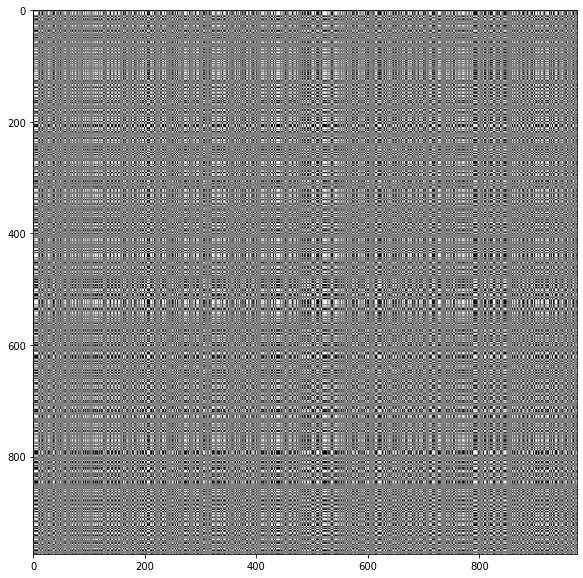

In [17]:
plt.figure(figsize=(12,10))
plt.imshow(
    final_proximity_matrix , 
    cmap='gray'
)
plt.show()